## Imports

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from neural_network import NeuralNet
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Auxiliary Functions

In [227]:
colour_map = 'rainbow'

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

def plot(X, Y):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=colour_map)
    plt.show()

def draw_confusion_matrix(Y, P):
    ConfusionMatrixDisplay(confusion_matrix(Y, P, normalize='true')).plot()
    plt.show()

def draw_decision_boundaries(X, Y, model):
    xx, yy = np.meshgrid(np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.1), np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.1))
    r1, r2 = xx.flatten(), yy.flatten()
    
    grid = np.hstack((r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))))
    
    preds = model.predict(grid)
    
    zz = preds.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, alpha=0.3, cmap=colour_map)
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=colour_map)
    plt.show()

## Gaussian Clouds

### Data

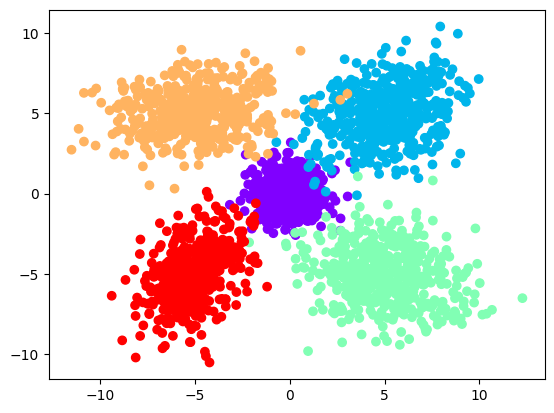

In [228]:
class_size = 500
K = 5

mean = [[0, 0], [5, 5], [5, -5], [-5, 5], [-5, -5]]
cov = [[[1, 0], [0, 1]], [[4, 1], [1, 3]], [[4, -0.5], [-0.5, 3]], [[5, 0.5], [0.5, 2]], [[2, 1], [1, 3]]]

X = np.vstack([np.random.multivariate_normal(mean[i], cov[i], class_size) for i in range(K)])
Y = np.hstack([i * np.ones(class_size) for i in range(K)]).astype(np.uint32)

# One-Hot Encoding
T = np.eye(K)[Y]

plot(X, Y)

### Training

In [229]:
ann = NeuralNet((20, 20, 20))

ann.train(X, T, num_epochs=2000)

predictions = ann.predict(X)

### Results

Accuracy: 0.9868


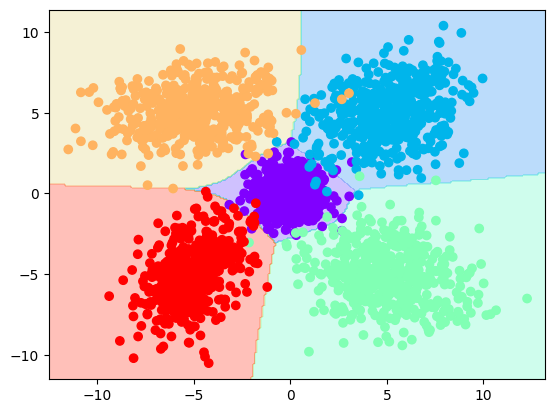

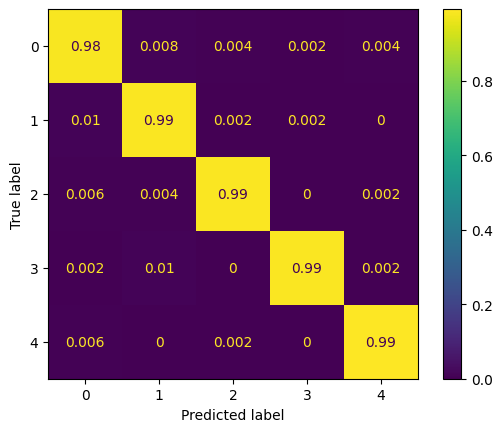

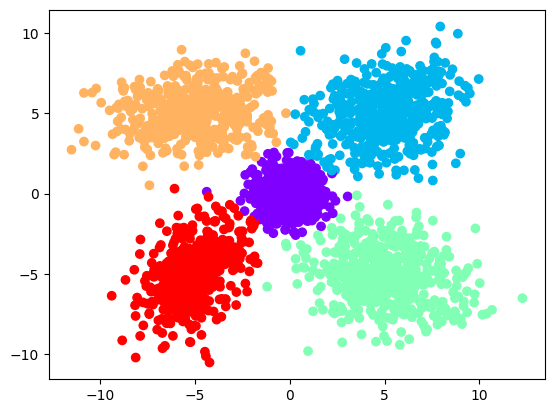

In [230]:
print('Accuracy:', classification_rate(Y, predictions))

draw_decision_boundaries(X, Y, ann)

draw_confusion_matrix(Y, predictions)

plot(X, predictions)

## Donut

### Data

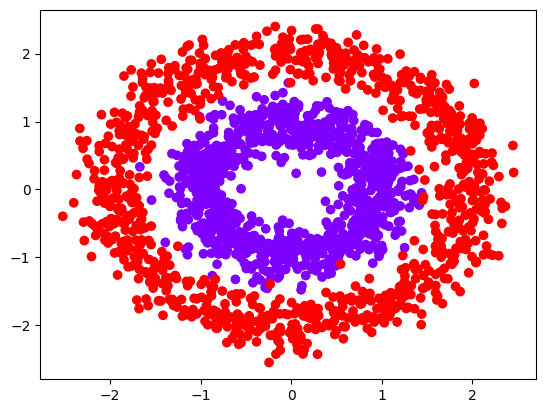

In [237]:
class_size = 1000
K = 2

r1 = np.random.normal(1, 0.2, class_size)
r2 = np.random.normal(2, 0.2, class_size)
theta1 = np.linspace(0, 2 * np.pi, class_size) + np.random.normal(0, 0.5, class_size)
theta2 = np.linspace(0, 2 * np.pi, class_size) + np.random.normal(0, 0.5, class_size)
X1 = np.vstack([r1 * np.cos(theta1), r1 * np.sin(theta1)])
X2 = np.vstack([r2 * np.cos(theta2), r2 * np.sin(theta2)])

X = np.hstack([X1, X2]).T
Y = np.hstack([i * np.ones(class_size) for i in range(K)]).astype(np.uint32)

# One-Hot Encoding
T = np.eye(K)[Y]

plot(X, Y)

### Training

In [238]:
ann = NeuralNet((100, 100, 100, 100), 'tanh', learning_rate=1e-4)

ann.train(X, T, num_epochs=20000)

predictions = ann.predict(X)

### Results

Accuracy: 0.996


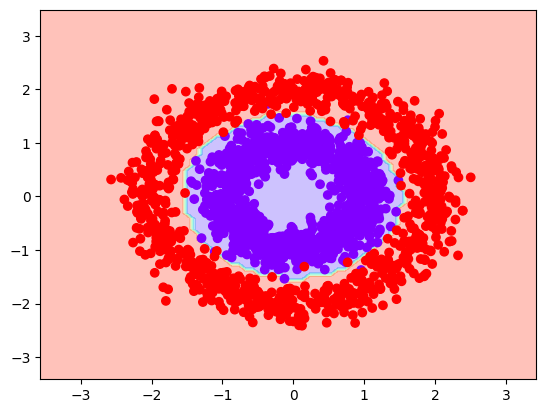

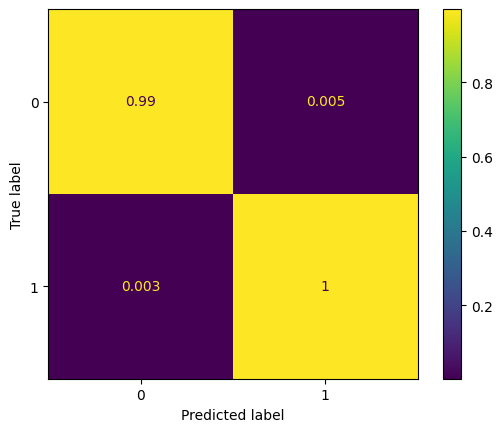

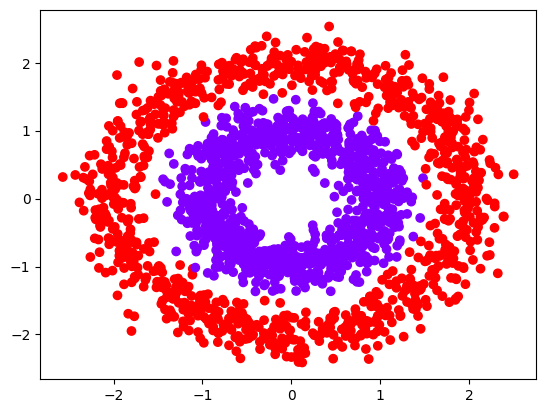

In [233]:
print('Accuracy:', classification_rate(Y, predictions))

draw_decision_boundaries(X, Y, ann)

draw_confusion_matrix(Y, predictions)

plot(X, predictions)

## XOR

### Data

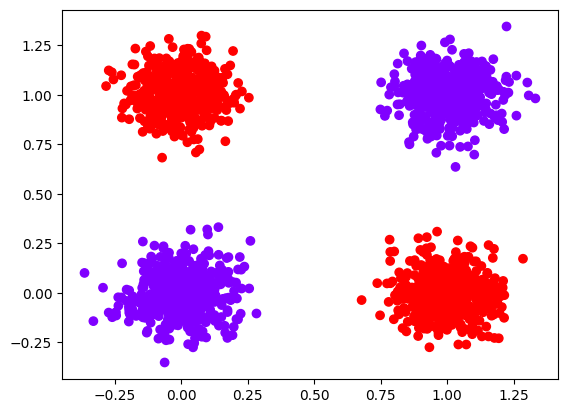

In [234]:
class_size = 500
K = 2

mean = [[0, 0], [0, 1], [1, 1], [1, 0]]
cov = [[0.01, 0], [0, 0.01]]

X = np.vstack([np.vstack([np.random.multivariate_normal(mean[i], cov, class_size), np.random.multivariate_normal(mean[i+2], cov, class_size)]) for i in range(K)])
Y = np.hstack([i * np.ones(2 * class_size) for i in range(K)]).astype(np.uint32)

# One-Hot Encoding
T = np.eye(K)[Y]

plot(X, Y)

### Training

In [235]:
ann = NeuralNet((10, 10, 10, 10), 'tanh', learning_rate=1e-4)

ann.train(X, T, num_epochs=2000)

predictions = ann.predict(X)

### Results

Accuracy: 1.0


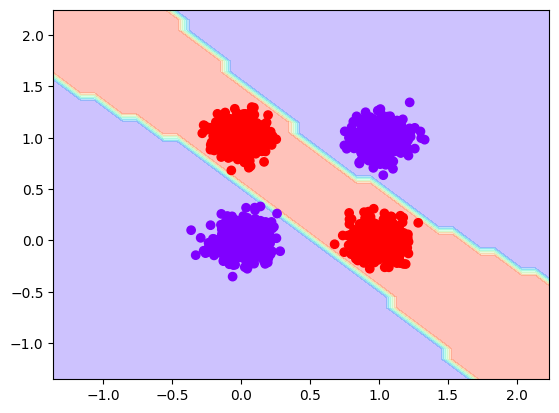

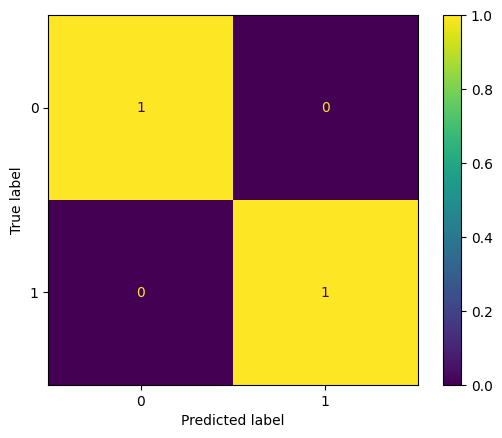

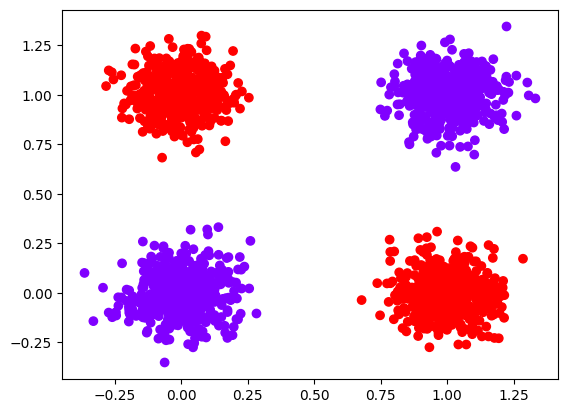

In [236]:
print('Accuracy:', classification_rate(Y, predictions))

draw_decision_boundaries(X, Y, ann)

draw_confusion_matrix(Y, predictions)

plot(X, predictions)